In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import src.model.flow_ot as flow_ot
import src.eval.finite_diff as finite_diff
import importlib
from sklearn.datasets import make_blobs

%matplotlib inline
sns.set_theme(style = "whitegrid")

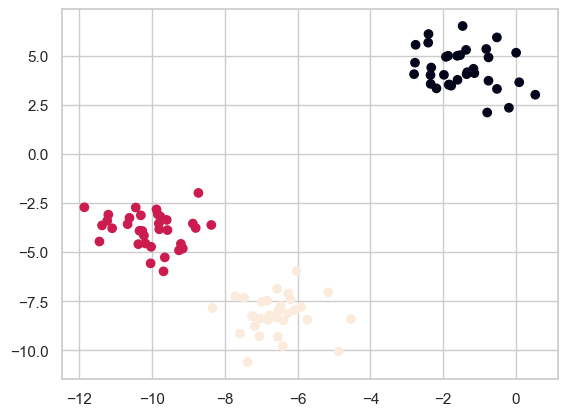

In [2]:
# Experimental set-up, generate data points X from a mixture of Gaussians. 
# We will use the first two dimensions of X as the observed data points and
# the last two dimensions as the hidden factors.
X, z, centers = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1, return_centers=True)
Z = z.reshape(100, 1)
plt.scatter(X[:, 0], X[:, 1], c=Z)

In [3]:
# set parameters for a single trial of the finite difference checker
REGULARIZER = 30
EPSILON = 0.00000001
TEST_VECTORS = np.eye(X.shape[1])
PARAMS = (X, X, Z, REGULARIZER)
INDEX = 0

# perform a single trial of the finite difference checker
approx = finite_diff.finite_difference(flow_ot.kl_barycenter_loss, EPSILON, X, INDEX, PARAMS, TEST_VECTORS)
actual = flow_ot.gaussian_kernel_kl_grad(X, X, REGULARIZER, flow_ot.gaussian_kernel(X), flow_ot.gaussian_kernel(Z))[INDEX]
print(finite_diff.comp(approx, actual))

0.2946414734964769


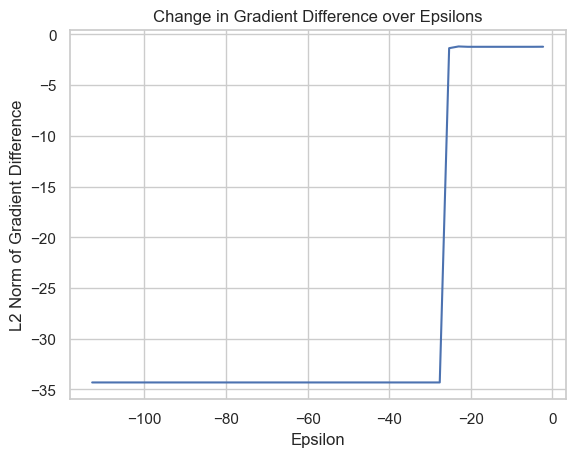

In [4]:
# set parameters for multiple trials of the finite difference checker
REGULARIZER = 30
TEST_VECTORS = np.eye(X.shape[1])
PARAMS = (X, X, Z, REGULARIZER)
INDEX = 0
PARAMS_GRAD = (X, REGULARIZER, flow_ot.gaussian_kernel(X), flow_ot.gaussian_kernel(Z))
EPSILONS = np.array([10**power for power in range(-1, -50, -1)])

finite_diff.plot_finite_difference(X, PARAMS, PARAMS_GRAD, INDEX, 
                                   flow_ot.kl_barycenter_loss, flow_ot.gaussian_kernel_kl_grad, 
                                   TEST_VECTORS, EPSILONS)